# Arbres binaires de recherche
Un arbre binaire de recherche (ABR) est un arbre binaire dont toutes les valeurs des noeuds peuvent être comparées et vérifient :

* les valeurs dans le sous arbre gauche d’un nœud ont des valeurs inférieures à lui;

* les valeurs dans le sous arbre droit d’un nœud ont des valeurs supérieures à lui.


## Constructeur et méthodes de base

In [1]:
class ABR:
    def __init__(self, valeur):
        #Attributs : valeur (en paramètre), gauche et droit( initialisés vides)
        self.valeur = valeur
        self.enfant_gauche = None
        self.enfant_droit = None
    def estVide(self):
        return self.valeur is None
    def estFeuille(self):
        return self.enfant_droit==None and self.enfant_gauche==None
    def inserer(self,y):
        x=self.valeur
        if y<x:
            if self.enfant_gauche == None:
                self.enfant_gauche = ABR(y)
            else :
                self.enfant_gauche.inserer(y)
        if y>x:
            if self.enfant_droit == None:
                self.enfant_droit = ABR(y)
            else :
                self.enfant_droit.inserer(y) 

## Création d'un arbre binaire de recherche

<div class="alert alert-success">
    <h3>A faire 1 </h3>
    Ecrire la fonction <i> creer_arbre</i> prenant en paramètres une liste de valeurs et créant  une instance de la classe ABR à partir de la liste de nombres  [6,4,5,8,7,9,3] ( placés dans cet ordre)

    

</div>

In [2]:
def creer_arbre(liste_noeuds):
    racine=ABR(liste_noeuds[0])
    for n in liste_noeuds[1:]:
        racine.inserer(n)
    return racine

In [3]:
liste_abr=[6,4,5,8,7,9,3] 
racine=creer_arbre(liste_abr)

In [4]:
def test1():
    assert racine.enfant_gauche==4
    assert racine.enfant_gauche.enfant_droit.valeur==5
    assert racine.enfant_gauche.enfant_gauche.valeur==3
    assert racine.enfant_droit==8
    assert racine.enfant_droit.enfant_droit.valeur==9
    assert racine.enfant_droit.enfant_gauche.valeur==7

# Affichage de l'arbre
On replace ici le programme nécessaire pour l'affichage de l'arbre

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
def hauteur(arbre):
    if arbre is None:
        return 0
    else:
        return 1 + max(hauteur(arbre.enfant_gauche), hauteur(arbre.enfant_droit))
def parcours(arbre, hauteur, pos_courante, noeuds=[], branches=[], position={}):
    """Parcours en profondeur récursif de l'arbre binaire
    entrées : arbre, liste des noeuds, liste des branches sous forme de tuple,
    dictionnaire des poistions (clés : nom des noeuds, valeur : tuple d'entiers)
    renvoie la liste des noeuds, des branches et le dictionnaire des positions"""
    if arbre is not None:
        noeuds.append(arbre.valeur)            # on complète la liste des noeuds
        position[arbre.valeur] = (pos_courante,hauteur)     # la liste des positions
        hauteur -= 1 #on change de profondeur()
        if arbre.enfant_gauche is not None:
            branches.append((arbre.valeur, arbre.enfant_gauche.valeur))  #on compléte la liste des branches
            parcours(arbre.enfant_gauche,hauteur,
                    pos_courante - 2**(hauteur-1 ), noeuds, branches, position )#Appel récursif à gauche
        if arbre.enfant_droit is not None:
            branches.append((arbre.valeur, arbre.enfant_droit.valeur))#on compléte la liste des branches
            parcours(arbre.enfant_droit, hauteur,
                    pos_courante + 2**(hauteur-1 ), noeuds, branches, position)#Appel récursif à droite
    return noeuds, branches, position
def repr_graph(racine):
    h=hauteur(racine)-1
    # appel d'une fonction récursive de parcours,
    # on récupère : la liste des noeuds, la liste des branches,
    # le dictionnaire des positions des noeuds
    noeuds, branches, position  = parcours(racine,h,2**(h))
    mon_arbre = nx.Graph() # objet Graphe de la bibliothèque Networkx
    mon_arbre.add_nodes_from(noeuds)#Ajoute les noeuds
    mon_arbre.add_edges_from(branches)#Ajoute les branches
    #On vide les listes noeuds et branches pour pouvoir réutiliser la fonction 
    #sans garder en mémoire les listes précédentes
    noeuds.clear()
    branches.clear()
    #Dess de l'arbre
    nx.draw_networkx(mon_arbre, pos = position)
    plt.show()#Affichage de matplotlib.pyplot
    return(mon_arbre)

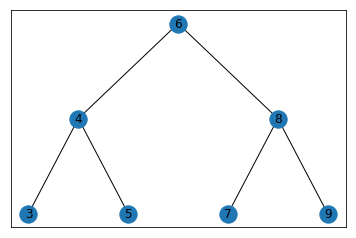

In [6]:
repr_graph(racine)

# Recherche dans un abr

<div class="alert alert-success">
    <h3>A faire 2 </h3>
    Ecrire la fonction de recherche <i>recherche(racine,y)</i> d'une valeur dans un arbre binaire de recherche.

</div>

In [7]:
def recherche(racine,y):
        x=racine.valeur
        if x==y:
            return True
        elif y<x and racine.enfant_gauche !=None:
            return recherche(racine.enfant_gauche,y)
        elif y>x and racine.enfant_droit !=None:
            return recherche(racine.enfant_droit,y)
        else :
            return False

In [8]:
def test2():
    assert recherche(racine,7)==True
    assert recherche(racine,4)==True
    assert recherche(racine,10)==False
    assert recherche(racine,2)==False

# Maximum dans un abr


<div class="alert alert-success">
    <h3>A faire 3 </h3>
    Ecrire la fonction <i>maxiABR(racine)</i> qui renvoie le maximum dans un arbre binaire de recherche.

</div>

In [9]:
def maxiABR(racine):
        if racine.enfant_droit==None:
            return racine.valeur
        else :
            x=racine.enfant_droit
            return max(maxiABR(x),racine.valeur)

In [10]:
def test2():
    assert maxiABR(racine)==9
    assert maxiABR(racine.enfant_gauche)==5

# ABR de mots

<div class="alert alert-success">
    <h3>A faire 3 </h3>
    <ul> <li> Créer un arbre binaire de recherche composé des mots : 'diu','nsi','info','distanciel','arbre','souris','clavier'</li>
        <li> rechercher les mots 'info' et 'bulle' à l'aide de cet arbre</li></ul>

</div>

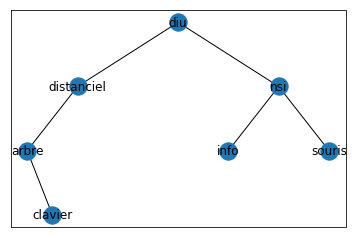

In [11]:
liste = ['diu','nsi','info','distanciel','arbre','souris','clavier']
abr_mots=creer_arbre(liste)
repr_graph(abr_mots)

In [12]:
recherche(abr_mots,'info')

True

In [13]:
recherche(abr_mots,'bulle')

False

<div class="alert alert-success">
    <h3>A faire 4 </h3>
     Ecrire le parcours qui permet de trier les valeurs d'un arbre binaire de recherche.

</div>

In [22]:
def infixe(n):
    
    if n!=None:  
        infixe(n.enfant_gauche)
        liste_noeuds_infixe.append(n.valeur)
        infixe(n.enfant_droit)


In [23]:
liste_noeuds_infixe=[]
infixe(abr_mots)
print(liste_noeuds_infixe)

['arbre', 'clavier', 'distanciel', 'diu', 'info', 'nsi', 'souris']
